# 연령별취업자수관계
- 국가통계포털에서 <mark>행정구역(시도)/성/연령별 취업자</mark> 데이터 다운로드
- https://kosis.kr/search/search.do <hr>
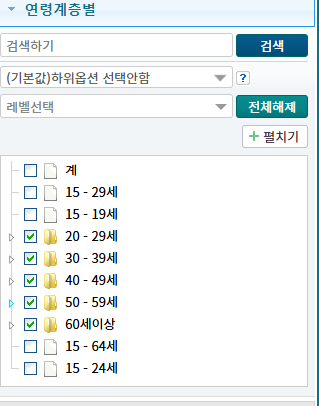

In [182]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm

In [206]:
# 윈도우용 폰트 경로 설정
path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
# plt.text(0.2,0.4,'한글',size=100)

In [199]:
file_path = "./ref/행정구역시도성연령별취업자20250304.csv"
ori = pd.read_csv(file_path, encoding="EUC-KR")


In [200]:
ex_data = ori.copy() #깊은복사
ex_data.columns = ['region','year','age','gender','value'] #컬럼이름 일괄교체
ex_data.loc[ex_data['region']=='세종특별자치시','value'] = ex_data[ex_data['region']=='세종특별자치시']['value'].replace('-',0)

In [201]:
ex_data['value'] = ex_data['value'].astype(int)
ex1_data = ex_data.groupby('year')['value'].sum().reset_index(name="total")

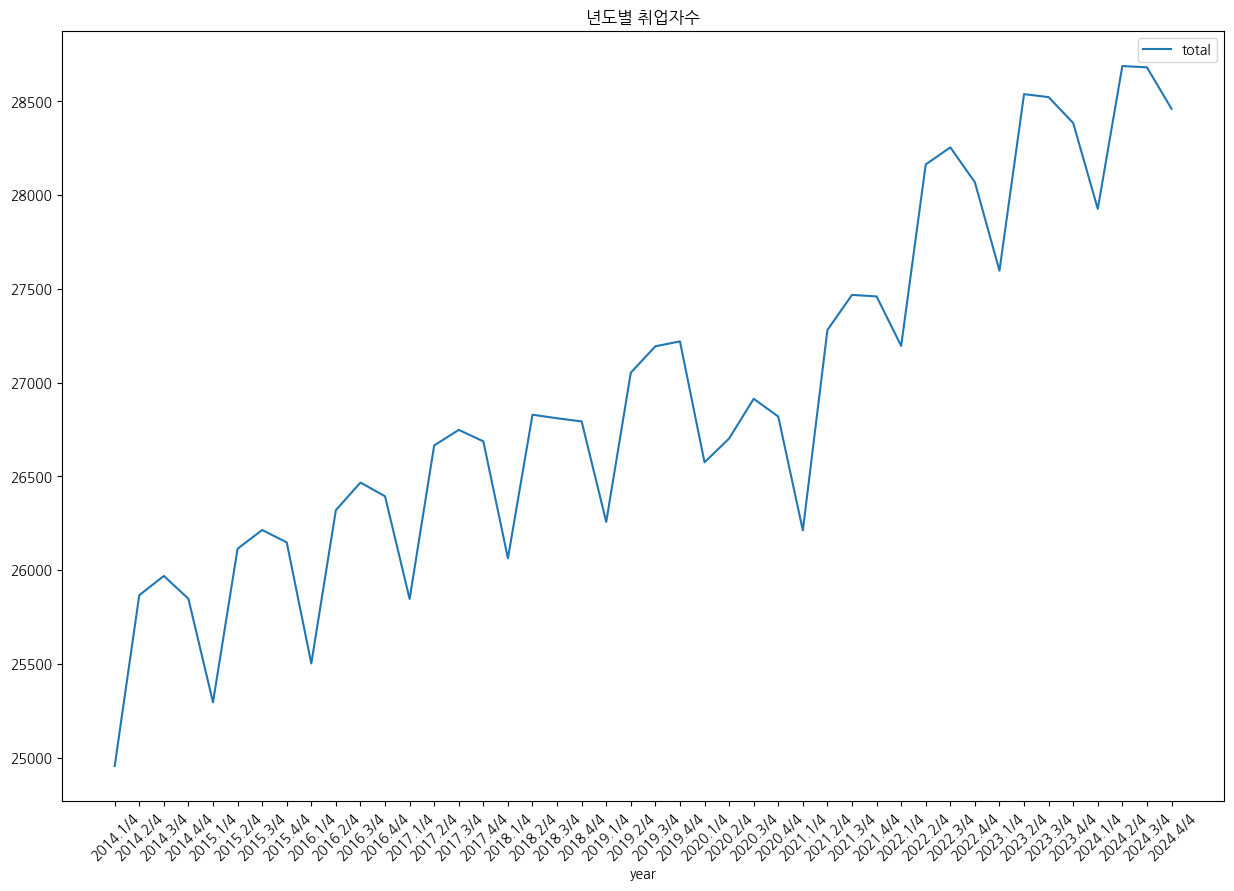

In [202]:
ax = ex1_data.plot(x='year',y='total',figsize=(15,10),title="년도별 취업자수")
ax.set_xticks(range(len(ex1_data)))
ax.set_xticklabels(ex1_data['year'], rotation = 45)
plt.show()

In [7]:
ex2_data = ori.copy() #깊은복사
ex2_data.columns = ['region','year','age','gender','value'] #컬럼이름 일괄교체
ex2_data.loc[ex2_data['region']=='세종특별자치시','value'] = ex2_data[ex2_data['region']=='세종특별자치시']['value'].replace('-',0)
# list(set(ex2_data['region']))

In [8]:
ex2_data['value'] = ex2_data['value'].astype(int)
gen = ex2_data.groupby(['year','gender'])['value'].sum().reset_index(name = 'total')

In [9]:
filter_m = gen['gender']=='남자'
filter_f = gen['gender']=='여자'
male = gen[filter_m]
female = gen[filter_f]

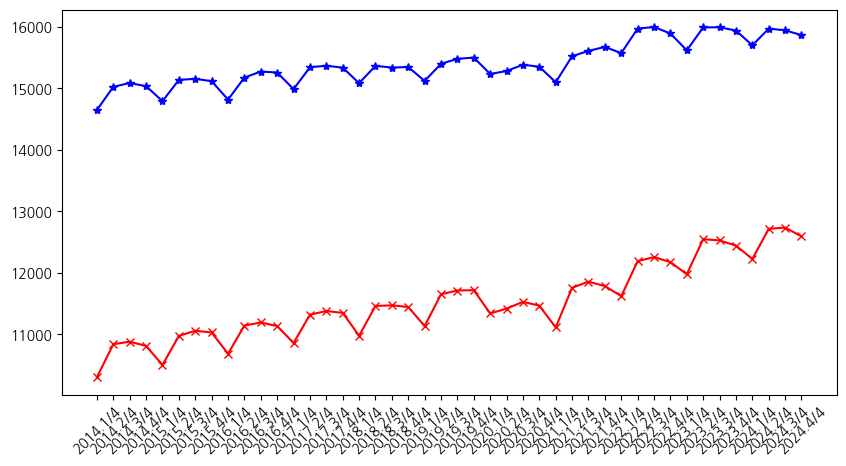

In [10]:
plt.figure(figsize=(10,5))
plt.plot(male['year'],male['total'],label='남자', color = 'blue',linestyle='-',marker='*')
plt.plot(female['year'],female['total'],label='여자', color = 'red',linestyle='-',marker='x')
plt.xticks(range(len(male)))
plt.xticks(rotation=45)
plt.show()

In [11]:
region_data = ex_data.groupby('region')['value'].sum().reset_index(name = 'total')

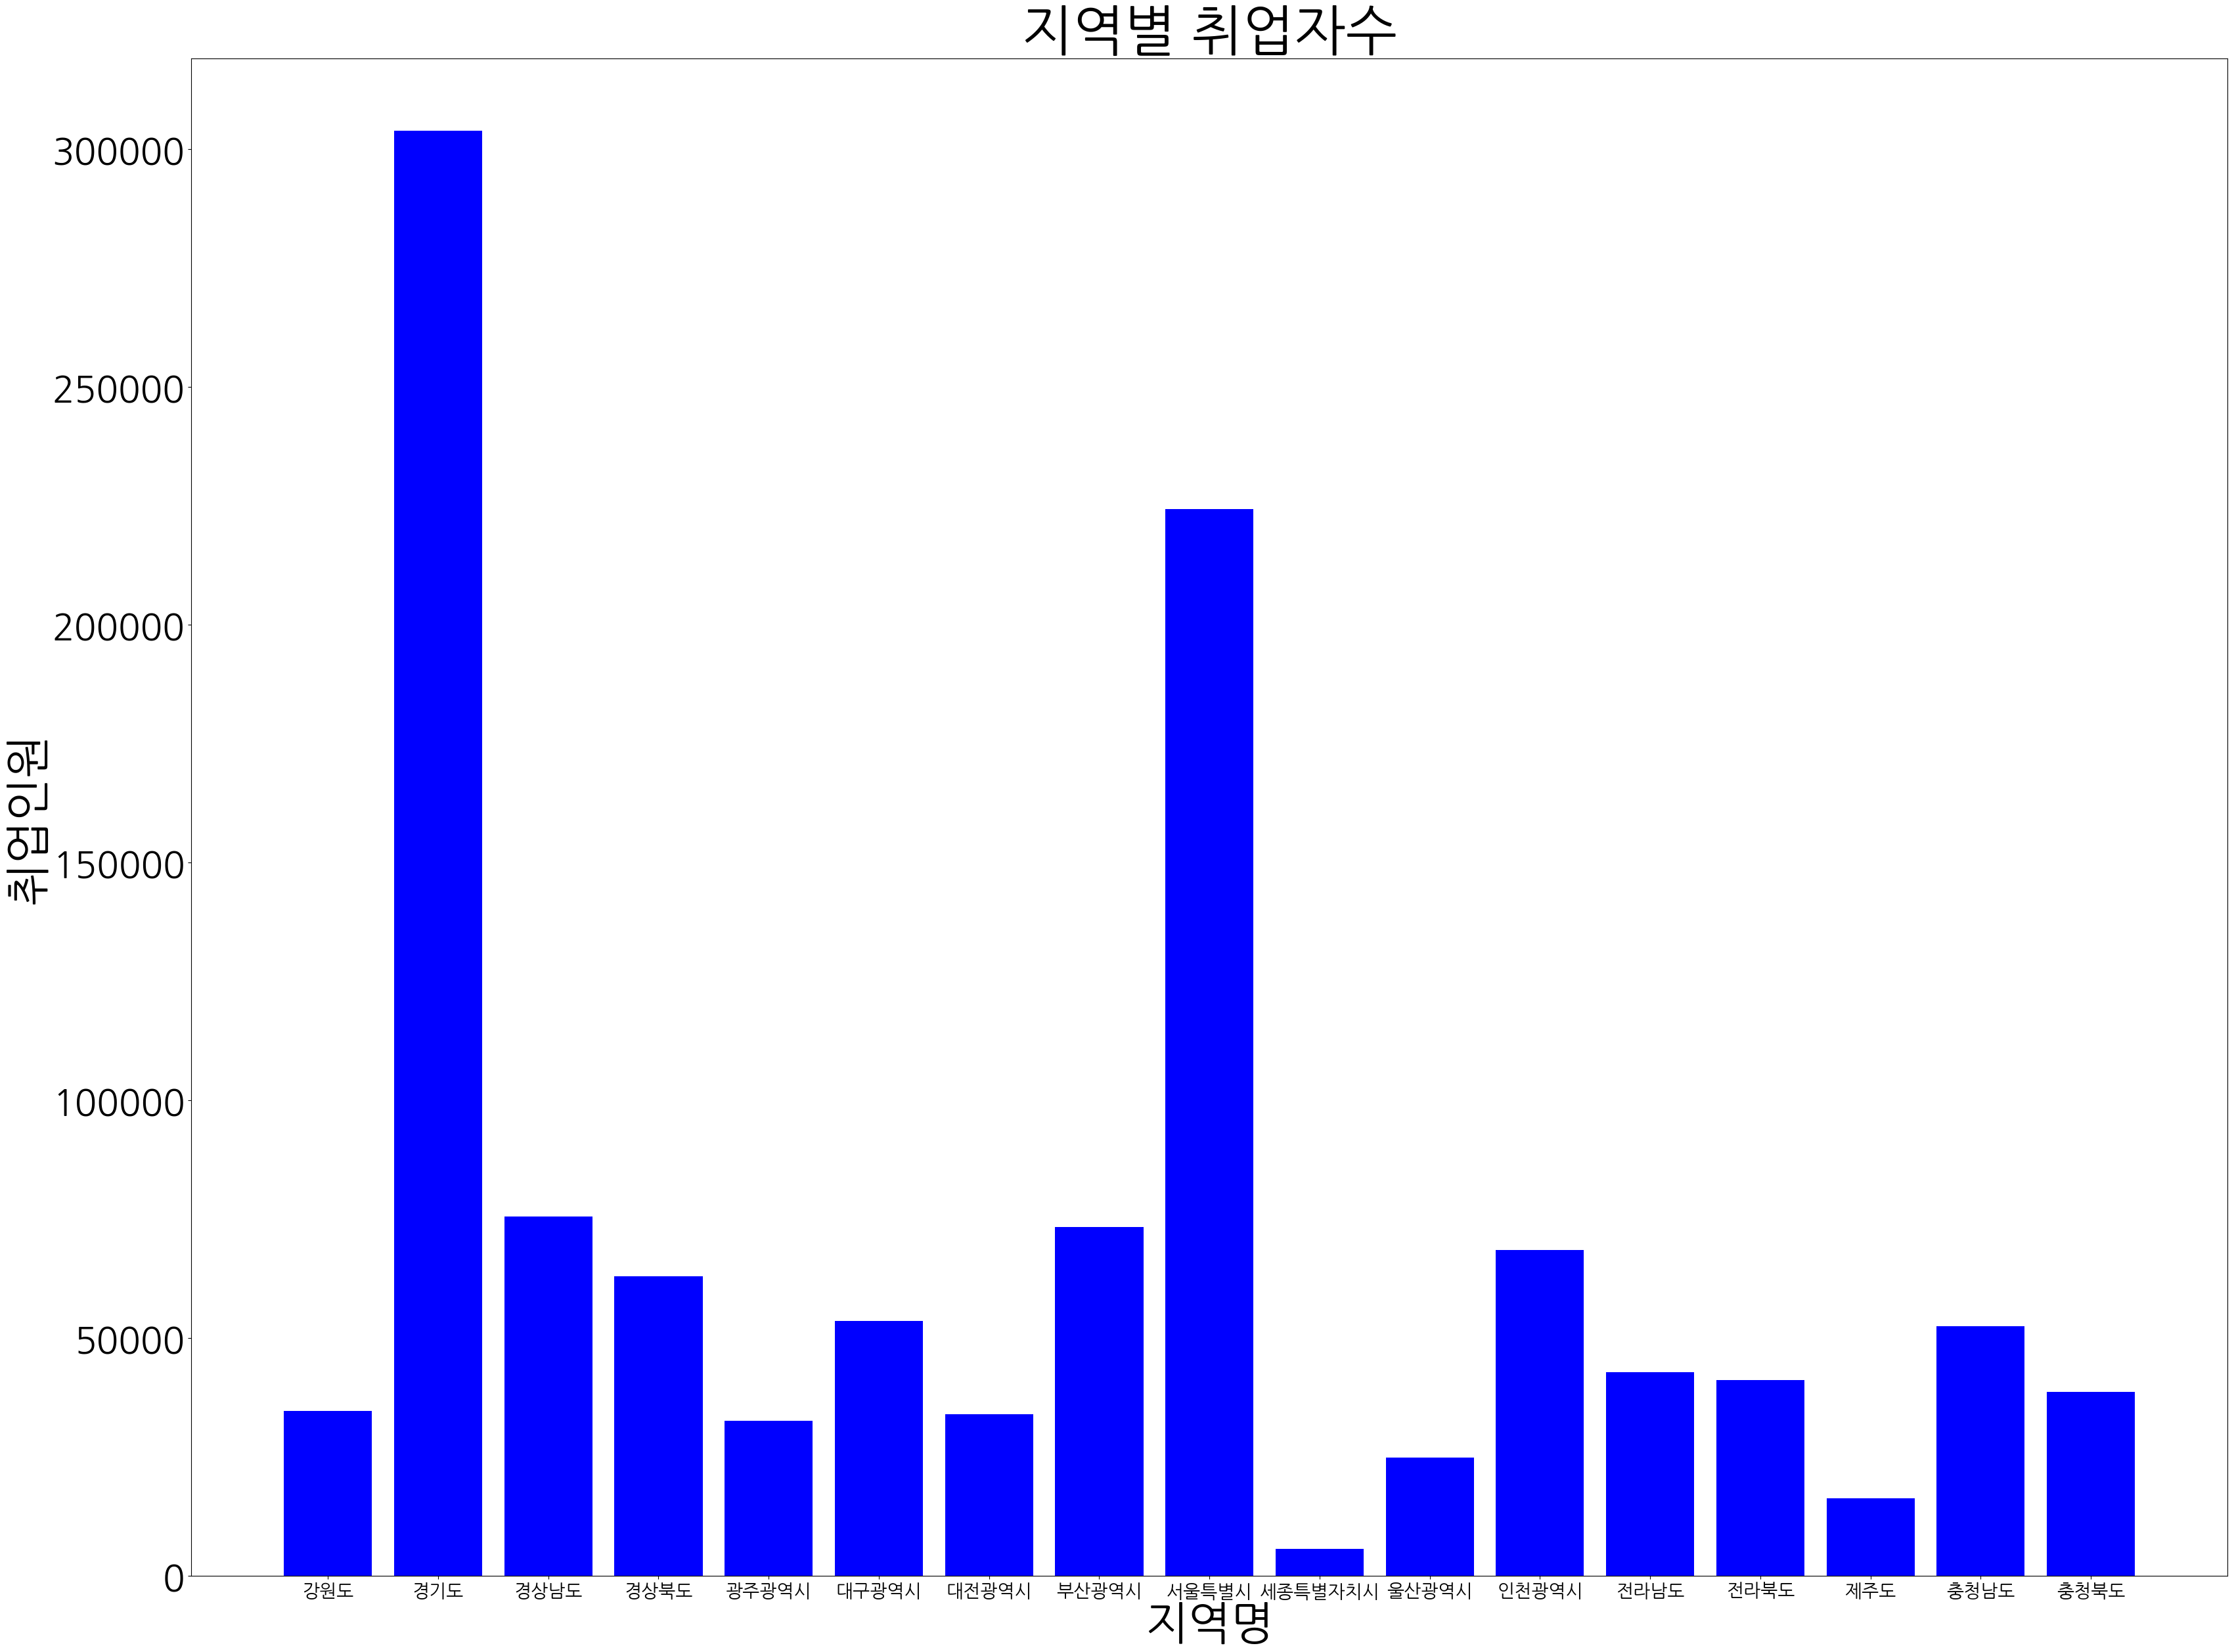

In [12]:
plt.figure(figsize=(40,30))
plt.bar(x = region_data['region'], height = region_data['total'],color='blue')

plt.xlabel('지역명', fontsize=50)
plt.ylabel('취업인원', fontsize=50)
plt.xticks(fontsize=20)  # x축 눈금 글씨 크기
plt.yticks(fontsize=40)  # y축 눈금 글씨 크기
plt.title('지역별 취업자수', fontsize=60)
plt.show()


2014년부터 2024년 분기별 행정구역(시도)/성/연령별 취업자 데이터 분석지표이다.<br>
분기별 분석결과 연도별로 1분기 취업자수가 가장 낮은 수치를 보이며 3분기에 가장 많은 취업자수를 보이고 있다.<br>
예외적으로 코로나 시기를 제외하면 취업자수는 계속해서 증가하는 추세이다.<br>
여성에 비해 남성이 약 5000명 정도 취업자수가 많은 편이며, 지역별 취업자수 인원 지표를 보았을 때 경기도가 가장 많은 취업자수를 차지하며 그 다음으로 서울특별시가 차지한다. 그 외의 지역은 유의미한 차이를 보이진 않으며 세종특별자치시가 약 5000명으로 매우 적은 수치를 보이고 있다.


In [45]:
ex3_data = ori.copy()
ex3_data.loc[:,'데이터'] = ex3_data.loc[:,'데이터'].replace("-",0).astype(int)
filter0 = (ex3_data['시점']>="2018.1/4") & (ex3_data['시점']<"2019.1/4")
ex3_data = ex3_data[filter0]
ex3_data.head()

,시도별,시점,연령계층별,성별,데이터
160,서울특별시,2018.1/4,20 - 29세,남자,339
161,서울특별시,2018.1/4,20 - 29세,여자,477
162,서울특별시,2018.1/4,30 - 39세,남자,693
163,서울특별시,2018.1/4,30 - 39세,여자,513
164,서울특별시,2018.1/4,40 - 49세,남자,719


In [132]:
ex3_data.loc[:,'데이터'] = ex3_data.loc[:,'데이터'].astype(int) #데이터타입 정수로 변환하여 계산 가능하도록

x_data = ex3_data[ex3_data['연령계층별'].isin(['20 - 29세'])] 
y_data = ex3_data[ex3_data['연령계층별'].isin(['60세이상'])]

x = x_data.groupby('시도별')['데이터'].sum()#.reset_index(name='total') #20대 취업자
y = y_data.groupby('시도별')['데이터'].sum()#.reset_index(name='total') #60세 이상 취업자
z = ex3_data.groupby('시도별')['데이터'].sum()#.reset_index(name='total') #전체 취업자

시도별
강원도         406
경기도        3917
경상남도        784
경상북도        608
광주광역시       433
대구광역시       606
대전광역시       457
부산광역시       917
서울특별시      3284
세종특별자치시      78
울산광역시       309
인천광역시       947
전라남도        350
전라북도        386
제주도         190
충청남도        633
충청북도        496
Name: 데이터, dtype: object


In [27]:
import numpy as np
regions = list(x['시도별'])
color = [ np.random.rand(3,) for _ in range(len(regions))]

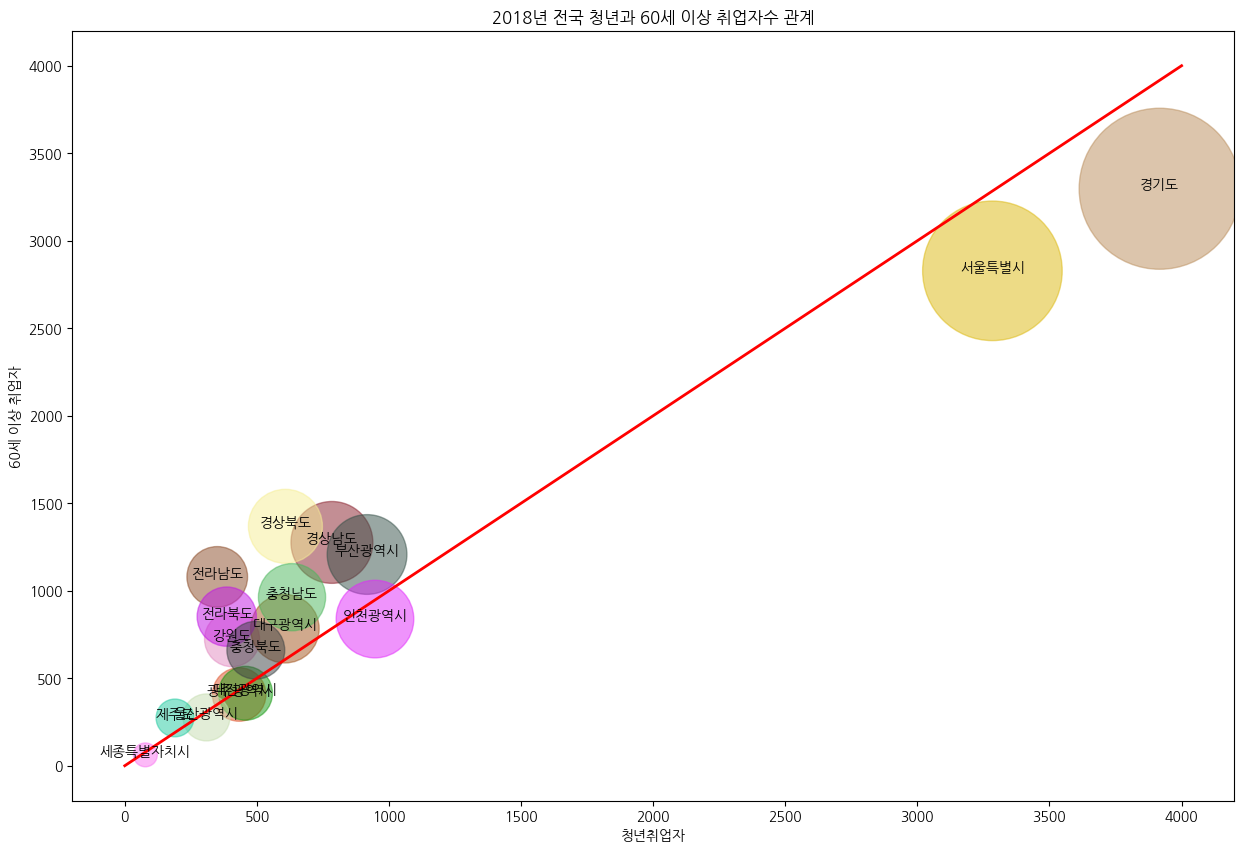

In [46]:
fig, ax = plt.subplots(figsize=(15,10))
z = np.array(z,dtype=float)
scatter = ax.scatter(x, y, s = z*0.5, c = color, alpha = 0.5)

for n in range(len(regions)):
    ax.annotate(regions[n], xy=(x.iloc[n],y.iloc[n]), ha='center')

ax.plot([0,4000],[0,4000], color = 'red', linestyle="-", linewidth=2)

ax.set_title("2018년 전국 청년과 60세 이상 취업자수 관계")
ax.set_xlabel('청년취업자')
ax.set_ylabel('60세 이상 취업자')
plt.show()

In [95]:
ex4_data = ori.copy()

In [96]:
ex4_data = ex4_data[ex4_data['시점']>="2024.1/4"] #2024년으로 변경
ex4_data['데이터'] = ex4_data['데이터'].astype(int)

In [112]:
data_20 = ex4_data[ex4_data['연령계층별'].isin(['20 - 29세'])]
data_60 = ex4_data[ex4_data['연령계층별'] == '60세이상']


data_20 = data_20.groupby('시도별')['데이터'].sum().reset_index()
import numpy as np
regions = list(data_20['시도별'])
color = [ np.random.rand(3,) for _ in range(len(regions))]

data_20 = data_20.groupby('시도별')['데이터'].sum()#.reset_index()
data_60 = data_60.groupby('시도별')['데이터'].sum()#.reset_index()
z = ex4_data.groupby('시도별')['데이터'].sum()

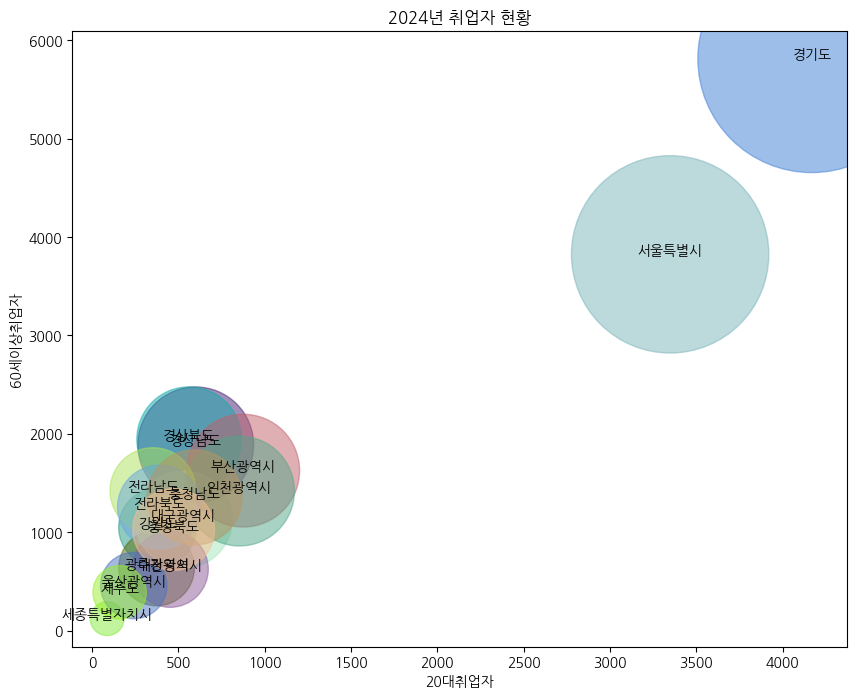

In [326]:
fig, ax = plt.subplots(figsize =(10,8))
z = np.array(z,dtype=float)
ax.scatter(data_20, data_60, s = z, c = color, alpha =0.5)

for n in range(len(regions)):
    ax.annotate(regions[n], xy=(data_20.iloc[n],data_60.iloc[n]), ha='center')

ax.set_title('2024년 취업자 현황')
ax.set_xlabel('20대취업자')
ax.set_ylabel('60세이상취업자')

plt.show()

In [312]:
ex_data = ori.copy() #깊은복사
ex_data.columns = ['region','year','age','gender','value'] #컬럼이름 일괄교체
ex_data.loc[ex_data['region']=='세종특별자치시','value'] = ex_data[ex_data['region']=='세종특별자치시']['value'].replace('-',0)
ex_data['value'] = ex_data['value'].astype(int)
ex1_data = ex_data.groupby('year')['value'].sum().reset_index(name="total")

In [314]:
for i in range(14,25):
    for n in range(1,5):
        ex1_data['year'] = ex1_data['year'].replace(f'20{i}.{n}/4',f'20{i}')

In [315]:
# !pip install prophet
# !pip install --upgrade plotly
# !pip install tqdm
# !pip install --upgrade jupyter ipywidgets

In [327]:
# 페이스북에서는 time(year)을 ds, value는 y를 사용하므로 전처리 해준다.
ex1_data['year'] = pd.to_datetime(ex1_data['year'], format ="%Y")
ex10_data = ex1_data.rename(columns={'year':'ds','total':'y'})
ex10_data

,ds,y
0,2014-01-01,24955
1,2014-01-01,25866
2,2014-01-01,25969
3,2014-01-01,25847
4,2015-01-01,25295
5,2015-01-01,26114
6,2015-01-01,26214
7,2015-01-01,26148
8,2016-01-01,25502
9,2016-01-01,26320


In [301]:
from prophet import Prophet

In [302]:
m = Prophet()
m.fit(ex10_data)

12:22:03 - cmdstanpy - INFO - Chain [1] start processing
12:22:03 - cmdstanpy - INFO - Chain [1] done processing


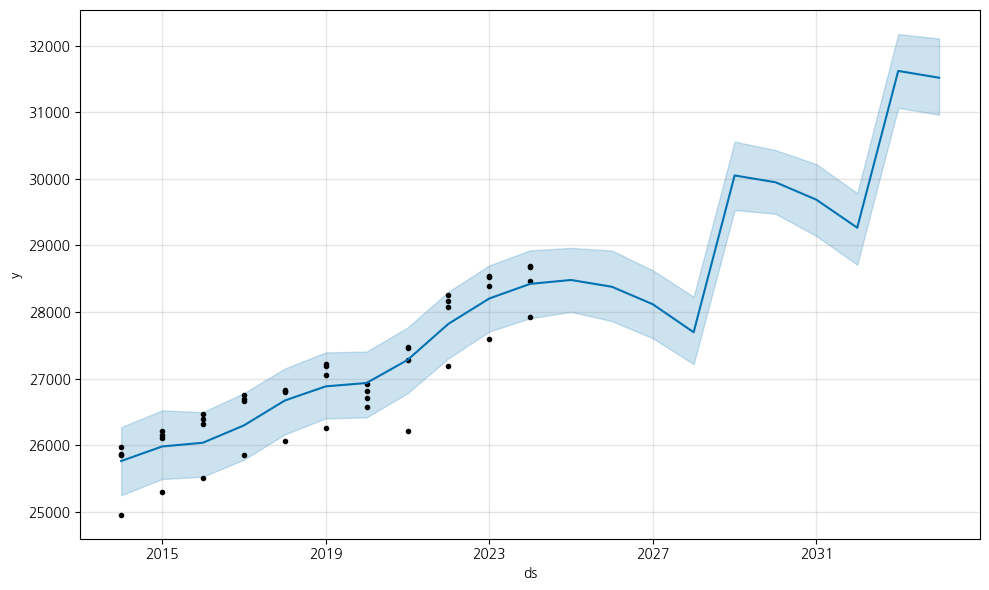

In [329]:
from matplotlib import rc
path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)

future = m.make_future_dataframe(periods=10, freq='YE') #10년후까지의 데이터 예측
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.show()